<a href="https://colab.research.google.com/github/trilaa/VIS/blob/main/VIS23_Z2_TIM14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tim 14 je radio zajedno na svim zadacima.**

In [ ]:
# Učitavanje biblioteka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import kstest, shapiro
import statsmodels.api as sm
import seaborn as sns

In [ ]:

from google.colab import drive

# Ova komanda ce zahtjevati odobrenje da ovaj notebook file pristupa google drive-u.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Učitavanje podataka
url = 'https://raw.githubusercontent.com/trilaa/VISS/main/googleplaystore.csv'
df = pd.read_csv(url)

In [ ]:
# Ispis prvih 10 redova
print(df.head(10))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1

In [ ]:
# Provjera izgleda seta podataka
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Prikazivanje informacija o datasetu
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [ ]:
# Pregled statističkih podataka
print(df.describe())


            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


In [ ]:
#Prosjek ocjena aplikacija po kategoriji
avg_rating_by_category = df.groupby('Category')['Rating'].mean()
print(avg_rating_by_category)


Category
1.9                    19.000000
ART_AND_DESIGN          4.358065
AUTO_AND_VEHICLES       4.190411
BEAUTY                  4.278571
BOOKS_AND_REFERENCE     4.346067
BUSINESS                4.121452
COMICS                  4.155172
COMMUNICATION           4.158537
DATING                  3.970769
EDUCATION               4.389032
ENTERTAINMENT           4.126174
EVENTS                  4.435556
FAMILY                  4.192272
FINANCE                 4.131889
FOOD_AND_DRINK          4.166972
GAME                    4.286326
HEALTH_AND_FITNESS      4.277104
HOUSE_AND_HOME          4.197368
LIBRARIES_AND_DEMO      4.178462
LIFESTYLE               4.094904
MAPS_AND_NAVIGATION     4.051613
MEDICAL                 4.189143
NEWS_AND_MAGAZINES      4.132189
PARENTING               4.300000
PERSONALIZATION         4.335987
PHOTOGRAPHY             4.192114
PRODUCTIVITY            4.211396
SHOPPING                4.259664
SOCIAL                  4.255598
SPORTS                  4.223511
T

In [ ]:
#Broj aplikacija u svakoj kategoriji
app_count_by_category = df['Category'].value_counts()
print(app_count_by_category)


FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64


In [ ]:
# Pretvaranje varijable 'Reviews' u numerički tip
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Ispis 10 aplikacija s najviše recenzija
top_reviewed_apps = df.nlargest(10, 'Reviews')
print(top_reviewed_apps[['App', 'Category', 'Reviews']])


                                           App       Category     Reviews
2544                                  Facebook         SOCIAL  78158306.0
3943                                  Facebook         SOCIAL  78128208.0
336                         WhatsApp Messenger  COMMUNICATION  69119316.0
381                         WhatsApp Messenger  COMMUNICATION  69119316.0
3904                        WhatsApp Messenger  COMMUNICATION  69109672.0
2604                                 Instagram         SOCIAL  66577446.0
2545                                 Instagram         SOCIAL  66577313.0
2611                                 Instagram         SOCIAL  66577313.0
3909                                 Instagram         SOCIAL  66509917.0
382   Messenger – Text and Video Chat for Free  COMMUNICATION  56646578.0


In [ ]:
#Broj aplikacija koje su besplatne i plaćene
app_type_count = df['Type'].value_counts()
print(app_type_count)


Free    10039
Paid      800
0           1
Name: Type, dtype: int64


In [ ]:
#Deskriptivna statistika za sve varijable u setu podataka
df.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,1.084000e+04,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,NaN,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,NaN,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,NaN,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,4.441529e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,2.927761e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,3.800000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,2.094000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,5.477550e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


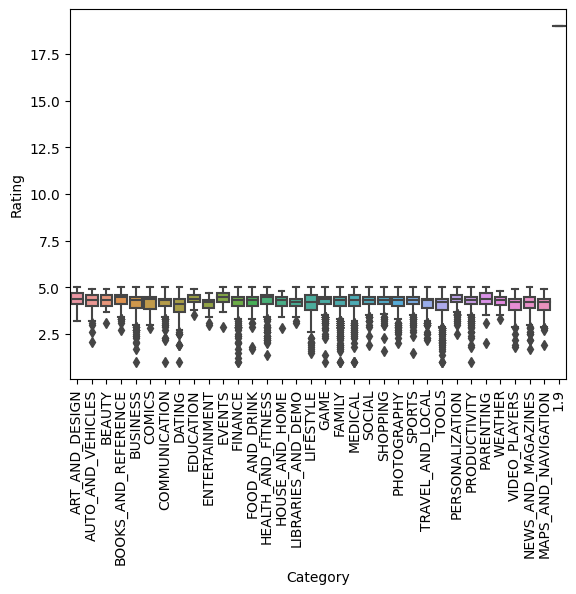

In [ ]:
#Vizualizacija distribucije ocjena aplikacija po kategoriji
import seaborn as sns

sns.boxplot(x='Category', y='Rating', data=df)
plt.xticks(rotation=90)
plt.show()


In [ ]:
#Chi-squared test
# Prvi par: 'Category' i 'Content Rating'
observed1 = pd.crosstab(df['Category'], df['Content Rating'])
chi2_1, pval_1, _, _ = chi2_contingency(observed1)

# Drugi par: 'Installs' i 'Type'
observed2 = pd.crosstab(df['Installs'], df['Type'])
chi2_2, pval_2, _, _ = chi2_contingency(observed2)

# Treći par: 'Category' i 'Genres'
observed3 = pd.crosstab(df['Category'], df['Genres'])
chi2_3, pval_3, _, _ = chi2_contingency(observed3)

# Ispis rezultata
print("Rezultati chi-kvadratnog testa nezavisnosti:")
print("1. 'Category' i 'Content Rating':")
print("   Chi-kvadratna vrijednost:", chi2_1)
print("   p-vrijednost:", pval_1)
print()
print("2. 'Installs' i 'Type':")
print("   Chi-kvadratna vrijednost:", chi2_2)
print("   p-vrijednost:", pval_2)
print()
print("3. 'Category' i 'Genres':")
print("   Chi-kvadratna vrijednost:", chi2_3)
print("   p-vrijednost:", pval_3)


Rezultati chi-kvadratnog testa nezavisnosti:
1. 'Category' i 'Content Rating':
   Chi-kvadratna vrijednost: 6690.761771401956
   p-vrijednost: 0.0

2. 'Installs' i 'Type':
   Chi-kvadratna vrijednost: 11623.273125730188
   p-vrijednost: 0.0

3. 'Category' i 'Genres':
   Chi-kvadratna vrijednost: 337229.96336698777
   p-vrijednost: 0.0


In [ ]:
# Kolmogorov-Smirnov i Shapiro-Wilk testovi
# Popis numeričkih varijabli u datasetu
numeric_vars = ['Rating', 'Reviews']

# Provjera normalne distribucije za svaku numeričku varijablu
for var in numeric_vars:
    data = df[var].dropna()  # Uklanjamo nedostajuće vrijednosti

    # Kolmogorov-Smirnov test
    ks_stat, ks_pval = kstest(data, 'norm')

    # Shapiro-Wilk test
    sw_stat, sw_pval = shapiro(data)

    # Ispis rezultata
    print(f"Varijabla: {var}")
    print(f"Kolmogorov-Smirnov test - Statistika: {ks_stat}, p-vrijednost: {ks_pval}")
    print(f"Shapiro-Wilk test - Statistika: {sw_stat}, p-vrijednost: {sw_pval}")

Varijabla: Rating
Kolmogorov-Smirnov test - Statistika: 0.9800591097463764, p-vrijednost: 0.0
Shapiro-Wilk test - Statistika: 0.8136816620826721, p-vrijednost: 0.0
Varijabla: Reviews
Kolmogorov-Smirnov test - Statistika: 0.8988346038133883, p-vrijednost: 0.0
Shapiro-Wilk test - Statistika: 0.12476170063018799, p-vrijednost: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Zaključak:**
*S obzirom da je p-vrijednost u testovima jednaka nuli, možemo odbaciti nultu hipotezu o normalnosti distribucije*

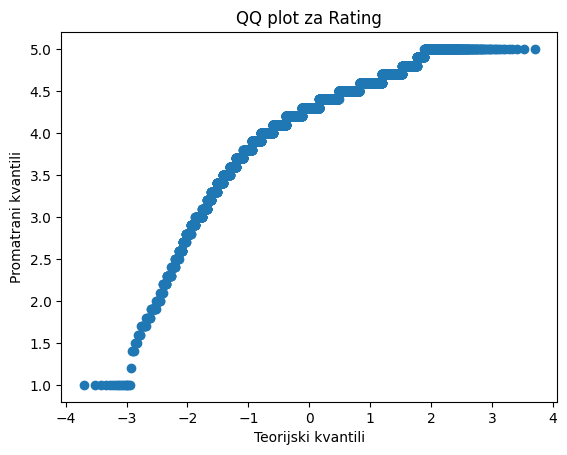

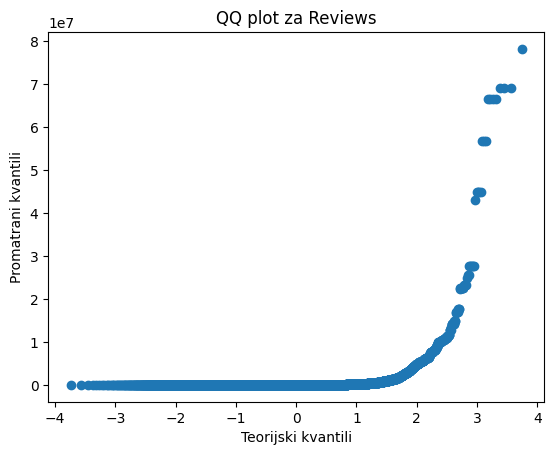

In [ ]:
# Izrada QQ plotova
for var in numeric_vars:
    data = df[var].dropna()  # Uklanjanje nedostajućih vrijednosti

    # Izračunavanje kvantila
    sorted_data = np.sort(data)
    quantiles = np.arange(len(data)) / (len(data) - 1)

    # Izračunavanje kvantila za normalnu distribuciju
    norm_quantiles = stats.norm.ppf(quantiles)

    # Crtanje QQ plota
    plt.scatter(norm_quantiles, sorted_data)
    plt.xlabel('Teorijski kvantili')
    plt.ylabel('Promatrani kvantili')
    plt.title(f'QQ plot za {var}')
    plt.show()

**Zaključak:**

1.Na QQ plotu za 'Rating', tačke su relativno blizu linije dijagonale, što ukazuje na to da podaci slijede približno normalnu distribuciju. Međutim, primjećuje se nekoliko odstupanja na krajevima, što sugerira da distribucija može imati neke asimetrije ili repove.

2.Za razliku od prvog QQ plota za 'Rating', QQ plot za 'Reviews' ne pravi dijagonalu i ima odstupanja na desnom kraju, što ukazuje kao u prvom primjeru na prisutnost ekstremnih vrijednosti ili asimetriju distribucije.


In [ ]:
# Popis numeričkih varijabli u datasetu
numeric_vars = ['Rating', 'Reviews']

# Veličina uzorka
sample_size = 100  # Odaberite odgovarajuću veličinu uzorka

# Izračunavanje intervala pouzdanosti srednje vrijednosti za svaku varijablu
confidence_level = 0.95  # Nivo pouzdanosti (95%)

for var in numeric_vars:
    data = df[var].dropna()  # Uklanjanje nedostajućih vrijednosti

    # Odabir uzorka veličine 'sample_size'
    sample = np.random.choice(data, size=sample_size, replace=False)

    # Izračunavanje srednje vrijednosti i standardne devijacije uzorka
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  # ddof=1 za nepristranu procjenu standardne devijacije

    # Izračunavanje standardne greške srednje vrijednosti
    std_error = sample_std / np.sqrt(sample_size)

    # Izračunavanje intervala pouzdanosti srednje vrijednosti
    margin_error = stats.t.ppf(1 - (1 - confidence_level) / 2, df=sample_size - 1) * std_error
    confidence_interval = (sample_mean - margin_error, sample_mean + margin_error)

    print(f"Interval pouzdanosti srednje vrijednosti za {var}: {confidence_interval}")

Interval pouzdanosti srednje vrijednosti za Rating: (4.072852463305429, 4.255147536694572)
Interval pouzdanosti srednje vrijednosti za Reviews: (100731.01583001815, 770729.8041699817)


In [ ]:
# Popis kategorijskih varijabli u datasetu
categorical_vars = ['Category', 'Content Rating', 'Type', 'Genres']

In [ ]:
# Kategorijska varijabla za koju želite izračunati interval pouzdanosti proporcije
var = 'Category'

# Veličina uzorka
sample_size = 100  # Odaberite odgovarajuću veličinu uzorka

# Izračunavanje intervala pouzdanosti proporcije
confidence_level = 0.95  # Nivo pouzdanosti (95%)

data = df[var].dropna()  # Uklanjanje nedostajućih vrijednosti

# Odabir uzorka veličine 'sample_size'
sample = np.random.choice(data, size=sample_size, replace=False)

# Izračunavanje broja pojavljivanja svake kategorije u uzorku
category_counts = np.unique(sample, return_counts=True)[1]

# Izračunavanje proporcije svake kategorije
proportions = category_counts / sample_size

# Izračunavanje standardne greške proporcije
std_error = np.sqrt(proportions * (1 - proportions) / sample_size)

# Izračunavanje intervala pouzdanosti proporcije
margin_error = stats.norm.ppf(1 - (1 - confidence_level) / 2) * std_error
confidence_intervals = np.column_stack((proportions - margin_error, proportions + margin_error))

print(f"Intervali pouzdanosti proporcije za {var}:")
for category, interval in zip(np.unique(sample), confidence_intervals):
    print(f"{category}: {interval}")

Intervali pouzdanosti proporcije za Category:
AUTO_AND_VEHICLES: [-0.00343448  0.06343448]
BOOKS_AND_REFERENCE: [-0.00343448  0.06343448]
BUSINESS: [0.01345343 0.10654657]
COMMUNICATION: [0.00728358 0.09271642]
DATING: [-0.0095014  0.0295014]
EDUCATION: [-0.0095014  0.0295014]
FAMILY: [0.13880922 0.30119078]
FINANCE: [0.00728358 0.09271642]
FOOD_AND_DRINK: [-0.00343448  0.06343448]
GAME: [0.02682751 0.13317249]
HEALTH_AND_FITNESS: [-0.0074395  0.0474395]
HOUSE_AND_HOME: [-0.0074395  0.0474395]
LIFESTYLE: [-0.0095014  0.0295014]
MEDICAL: [0.00159271 0.07840729]
NEWS_AND_MAGAZINES: [-0.00343448  0.06343448]
PERSONALIZATION: [-0.0074395  0.0474395]
PHOTOGRAPHY: [0.00159271 0.07840729]
PRODUCTIVITY: [-0.0074395  0.0474395]
SHOPPING: [0.00159271 0.07840729]
SOCIAL: [0.00728358 0.09271642]
SPORTS: [0.00159271 0.07840729]
TOOLS: [0.00728358 0.09271642]
TRAVEL_AND_LOCAL: [0.00159271 0.07840729]
WEATHER: [-0.0095014  0.0295014]


In [ ]:
# Kategorijska varijabla za koju želimo izračunati interval pouzdanosti proporcije
var = 'Content Rating'

# Veličina uzorka
sample_size = 100  # Odaberite odgovarajuću veličinu uzorka

# Izračunavanje intervala pouzdanosti proporcije
confidence_level = 0.95  # Nivo pouzdanosti (95%)

data = df[var].dropna()  # Uklanjanje nedostajućih vrijednosti

# Odabir uzorka veličine 'sample_size'
sample = np.random.choice(data, size=sample_size, replace=False)

# Izračunavanje broja pojavljivanja svake kategorije u uzorku
category_counts = np.unique(sample, return_counts=True)[1]

# Izračunavanje proporcije svake kategorije
proportions = category_counts / sample_size

# Izračunavanje standardne greške proporcije
std_error = np.sqrt(proportions * (1 - proportions) / sample_size)

# Izračunavanje intervala pouzdanosti proporcije
margin_error = stats.norm.ppf(1 - (1 - confidence_level) / 2) * std_error
confidence_intervals = np.column_stack((proportions - margin_error, proportions + margin_error))

print(f"Intervali pouzdanosti proporcije za {var}:")
for category, interval in zip(np.unique(sample), confidence_intervals):
    print(f"{category}: {interval}")

Intervali pouzdanosti proporcije za Content Rating:
Everyone: [0.79199179 0.92800821]
Everyone 10+: [-0.0074395  0.0474395]
Mature 17+: [-0.0095014  0.0295014]
Teen: [0.04867473 0.17132527]


In [ ]:
# Kategorijska varijabla za koju želimo izračunati interval pouzdanosti proporcije
var = 'Type'

# Veličina uzorka
sample_size = 100  # Odaberite odgovarajuću veličinu uzorka

# Izračunavanje intervala pouzdanosti proporcije
confidence_level = 0.95  # Nivo pouzdanosti (95%)

data = df[var].dropna()  # Uklanjanje nedostajućih vrijednosti

# Odabir uzorka veličine 'sample_size'
sample = np.random.choice(data, size=sample_size, replace=False)

# Izračunavanje broja pojavljivanja svake kategorije u uzorku
category_counts = np.unique(sample, return_counts=True)[1]

# Izračunavanje proporcije svake kategorije
proportions = category_counts / sample_size

# Izračunavanje standardne greške proporcije
std_error = np.sqrt(proportions * (1 - proportions) / sample_size)

# Izračunavanje intervala pouzdanosti proporcije
margin_error = stats.norm.ppf(1 - (1 - confidence_level) / 2) * std_error
confidence_intervals = np.column_stack((proportions - margin_error, proportions + margin_error))

print(f"Intervali pouzdanosti proporcije za {var}:")
for category, interval in zip(np.unique(sample), confidence_intervals):
    print(f"{category}: {interval}")

Intervali pouzdanosti proporcije za Type:
Free: [0.86682751 0.97317249]
Paid: [0.02682751 0.13317249]


In [ ]:
# Kategorijska varijabla za koju želimo izračunati interval pouzdanosti proporcije
var = 'Genres'

# Veličina uzorka
sample_size = 100  # Odaberite odgovarajuću veličinu uzorka

# Izračunavanje intervala pouzdanosti proporcije
confidence_level = 0.95  # Nivo pouzdanosti (95%)

data = df[var].dropna()  # Uklanjanje nedostajućih vrijednosti

# Odabir uzorka veličine 'sample_size'
sample = np.random.choice(data, size=sample_size, replace=False)

# Izračunavanje broja pojavljivanja svake kategorije u uzorku
category_counts = np.unique(sample, return_counts=True)[1]

# Izračunavanje proporcije svake kategorije
proportions = category_counts / sample_size

# Izračunavanje standardne greške proporcije
std_error = np.sqrt(proportions * (1 - proportions) / sample_size)

# Izračunavanje intervala pouzdanosti proporcije
margin_error = stats.norm.ppf(1 - (1 - confidence_level) / 2) * std_error
confidence_intervals = np.column_stack((proportions - margin_error, proportions + margin_error))

print(f"Intervali pouzdanosti proporcije za {var}:")
for category, interval in zip(np.unique(sample), confidence_intervals):
    print(f"{category}: {interval}")

Intervali pouzdanosti proporcije za Genres:
Action: [0.02682751 0.13317249]
Arcade: [-0.0074395  0.0474395]
Art & Design: [-0.0095014  0.0295014]
Auto & Vehicles: [-0.0095014  0.0295014]
Beauty: [-0.0095014  0.0295014]
Board: [-0.0095014  0.0295014]
Books & Reference: [-0.0074395  0.0474395]
Business: [-0.0074395  0.0474395]
Casual: [-0.0095014  0.0295014]
Communication: [-0.0074395  0.0474395]
Dating: [-0.0095014  0.0295014]
Education: [0.01345343 0.10654657]
Educational;Action & Adventure: [-0.0095014  0.0295014]
Educational;Education: [-0.0095014  0.0295014]
Entertainment: [0.00159271 0.07840729]
Events: [-0.0095014  0.0295014]
Finance: [-0.0095014  0.0295014]
Food & Drink: [-0.00343448  0.06343448]
Health & Fitness: [0.00159271 0.07840729]
Libraries & Demo: [-0.0095014  0.0295014]
Lifestyle: [0.01345343 0.10654657]
Medical: [-0.0095014  0.0295014]
News & Magazines: [-0.0095014  0.0295014]
Personalization: [0.02682751 0.13317249]
Photography: [-0.00343448  0.06343448]
Productivity: 

In [ ]:
#BONUS ZADATAK:  Linearna regresija
# Odabir relevantnih varijabli
predictor_vars = ['Reviews', 'Size', 'Installs', 'Price']
target_var = 'Rating'

# Izdvajanje podataka
data = df[predictor_vars + [target_var]].dropna()

# Konverzija numeričkih varijabli u odgovarajući tip
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data['Size'] = data['Size'].replace('Varies with device', np.nan)
data['Size'] = data['Size'].str.extract(r'(\d+\.?\d*)').astype(float) * 1e6

# Provjera vrijednosti 'Installs'
data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '')
data.loc[data['Installs'] == 'Free', 'Installs'] = np.nan
data['Installs'] = data['Installs'].astype(float)

# Provjera vrijednosti 'Price'
data['Price'] = data['Price'].str.replace('$', '').replace('Everyone', np.nan).astype(float)

# Uklanjanje NaN vrijednosti
data = data.dropna()

# Definiranje matrice prediktora i vektora cilja
X = data[predictor_vars]
y = data[target_var]

# Dodavanje stupca za konstantu
X = sm.add_constant(X)

# Fitiranje modela linearne regresije
model = sm.OLS(y, X)
results = model.fit()

# Ispis rezultata
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     14.12
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.75e-11
Time:                        11:46:14   Log-Likelihood:                -6240.8
No. Observations:                7729   AIC:                         1.249e+04
Df Residuals:                    7724   BIC:                         1.253e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1721      0.007    619.131      0.0

<ipython-input-4-fe3d78f51536>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '')
<ipython-input-4-fe3d78f51536>:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$', '').replace('Everyone', np.nan).astype(float)


***Obrazloženje postavljenog modela:***
Za model linearne regresije smo uzeli Rating jer je jedna od varijabli koje se  koriste kao mjera zadovoljstva korisnika i kvalitete aplikacije. Naša ideja je bila da pokažemo kako ce se Rating mijenjati kada se mijenjaju vrijednosti prediktora i varijabli koje utiču na nju.

***Obrazloženje dobivenih rezultata:***

***R-squared: 0.007:***Ova vrijednost predstavlja koeficijent determinacije.

***Adj. R-squared: 0.007:***Prilagođeni koeficijent determinacije uzima u obzir broj prediktora u modelu i korigira R-kvadrat kako bi se uzela u obzir njihova prisutnost.

***F-statistic: 14.12:***F-statistika mjeri značajnost ukupne regresije. Veća vrijednost F-statistike ukazuje na veću značajnost modela.

***Prob (F-statistic): 1.75e-11:***Ova vrijednost predstavlja p-vrijednost F-statistike. Mala p-vrijednost ukazuje na to da je model statistički značajan.

***Konstanta (const): 4.1721***: Ova vrijednost predstavlja procijenjenu ocjenu kada su svi ostali prediktori jednaki nuli.

***Reviews: 2.275e-08:***Ovaj koeficijent predstavlja utjecaj broja recenzija (Reviews) na ocjenu. Svako povećanje broja recenzija za jedinicu rezultira povećanjem ocjene za 2.275e-08.

***Size: -1.245e-10:***Ovaj koeficijent predstavlja utjecaj veličine aplikacije (Size) na ocjenu. Svako povećanje veličine za jedinicu rezultira smanjenjem ocjene za 1.245e-10. Međutim, p-vrijednost je 0.059, što znači da ovaj koeficijent nije statistički značajan na konvencionalnoj razini značajnosti od 0.05.

***Installs: 4.457e-11:***Ovaj koeficijent predstavlja utjecaj broja instalacija (Installs) na ocjenu. Svako povećanje broja instalacija za jedinicu rezultira povećanjem ocjene za 4.457e-11. Međutim, p-vrijednost je visoka (0.778), što ukazuje da ovaj koeficijent nije statistički značajan.

***Price: -0.0006:***Ovaj koeficijent predstavlja utjecaj cijene (Price) aplikacije na ocjenu. Svako povećanje cijene za jedinicu rezultira smanjenjem ocjene za 0.0006. P-vrijednost je 0.077, što znači da ovaj koeficijent nije statistički značajan na konvencionalnoj razini značajnosti od 0.05, ali je blizu granice!

***Ostale informacije:***

***Jarque-Bera (JB): 12316.343*** - Jarque-Bera test provjerava normalnost distribucije reziduala(mjera odstupanja između stvarnih promatranja i vrijednosti koje model predviđa za ta promatranja). U ovom slučaju, rezultat testa je visok (12316.343), što ukazuje da reziduali nisu normalno distribuirani.

***Durbin-Watson: 1.800 ***- Durbin-Watson statistika provjerava prisutnost autokorelacije u rezidualima. Vrijednost blizu 2 ukazuje na odsutnost autokorelacije. U ovom slučaju, vrijednost od 1.800 ukazuje na prisutnost neke pozitivne serijske korelacije.

***Standard Errors:*** Standardne pogreške koeficijenata. One mjere koliko su procijenjeni koeficijenti precizni.

***Hipoteza 1***: Aplikacije sa većim brojem preuzimanja (Installs) imaju više recenzija (Reviews) na Google Play Store-u.

Da bismo provjerili ovu hipotezu,analizirati ćemo scatter plot grafike i provjeriti postoji li veza izmedju broja preuzimanja i broja recenzija. Pored scatter plot grafika, koristiti ćemo i Violin plot  graficki prikaz koji kombinuje histogram i kernel density plot, i omogućava nam da vizualno analiziramo raspodjelu ocjena u svakoj kategoriji broja instalacija.

<Axes: xlabel='Installs', ylabel='Reviews'>

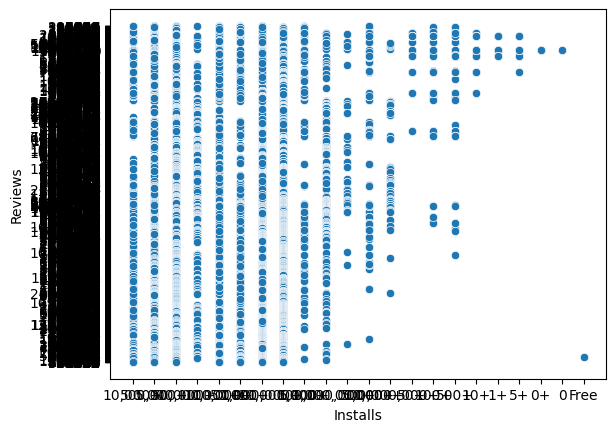

In [ ]:
#Scatter plot
# Učitavanje
data = pd.read_csv(url)

# Analiza podataka
# Scatter plot: broj preuzimanja (Installs) u odnosu na broj recenzija (Reviews)
sns.scatterplot(x="Installs", y="Reviews", data=data)

<ipython-input-6-9827d532efcf>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Installs'] = pd.to_numeric(data['Installs'].str.replace(',', '').str.replace('+', ''), errors='coerce')


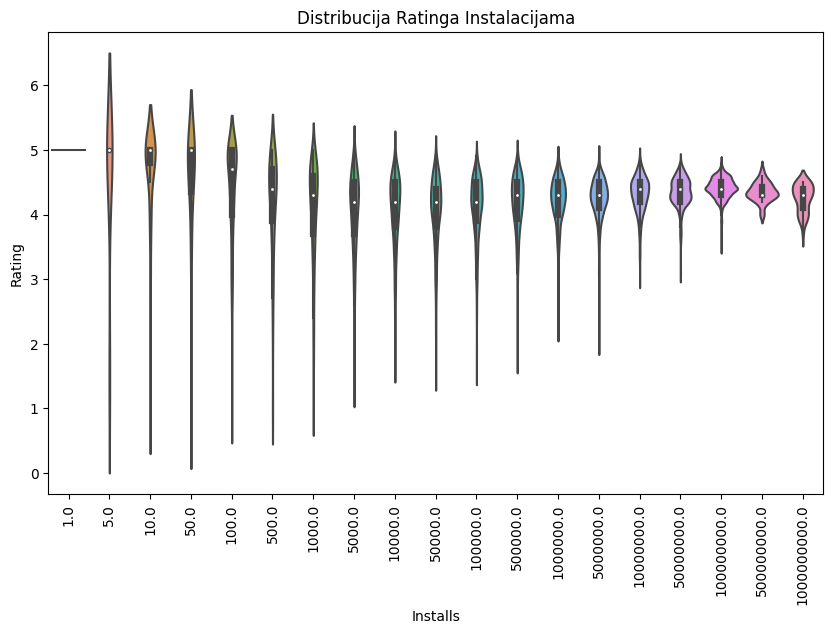

In [ ]:
#Violin plot
# Učitavanje dataset-a
data = pd.read_csv(url)

# Pretvaranje varijable "Installs" u numerički oblik
data['Installs'] = pd.to_numeric(data['Installs'].str.replace(',', '').str.replace('+', ''), errors='coerce')

# Uklanjanje NaN vrijednosti
# Uklanjanje NaN vrijednosti
data = data.dropna(subset=['Installs', 'Rating'])

# Prikaz violin plot-a
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['Installs'], y=data['Rating'])
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.title('Distribucija Ratinga Instalacijama')
plt.xticks(rotation=90)
plt.show()

**Zaključak:**Na temelju scatter plot grafika, primjećujemo da postoji pozitivna korelacija između broja preuzimanja i broja recenzija na Google Play Store-u. Općenito, aplikacije s većim brojem preuzimanja imaju tendenciju da imaju i više recenzija. Ovo podržava nasu hipotezu da aplikacije s većim brojem preuzimanja imaju više recenzija. Sa Violin plot grafikom smo zaključili slejedeće:

**1.**Niži broj instalacija (npr. manje od 1 milion) ima veću varijabilnost ocjena, s rasponom ocjena koje se protežu od niskih do visokih vrijednosti.

**2.**Kategorija srednjeg broja instalacija (npr. od 1 milion do 100 miliona) ima tendenciju da se ocjene koncentriraju oko prosječnih vrijednosti, s manjom varijabilnošću ocjena.

**3.**Visoki broj instalacija (npr. preko 100 miliona) takodjer pokazuje veću varijabilnost ocjena, ali primjećujemo da postoji veći udio visokih ocjena u ovoj kategoriji.

**Hipoteza 2**: Postoji veza između broja preuzimanja aplikacija (Installs) i ocjene korisnika (Rating) u Google Play prodavnici.

Za ovu analizu hipoteze prikazati ćemo distribuciju korisnika koristeći histogram, a za utvrđivanje veze između ove dvije varijable ćemo izračunati korelacijski koeficijent. Grupisati ćemo aplikacije na osnovu broja preuzimanja i prikazati prosječnu ocjenu za svaku grupu. Za vizualizaciju koristimo scatter plot.

<ipython-input-55-a6cb93fc1d0e>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '')


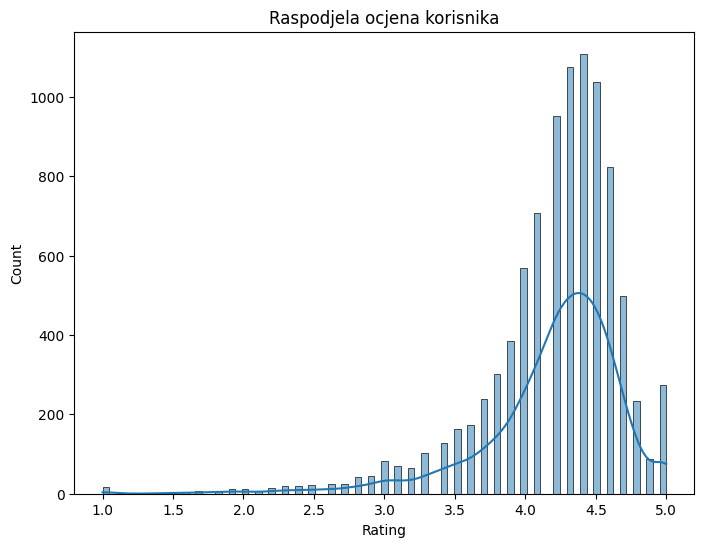

Korelacijski koeficijent između broja preuzimanja i ocjene: 0.05135456605599932
Prosječna ocjena po grupama broja preuzimanja:
Installs
(0.0, 100000.0]            4.106789
(100000.0, 1000000.0]      4.207470
(1000000.0, 10000000.0]    4.287076
(10000000.0, inf]          4.374396
Name: Rating, dtype: float64


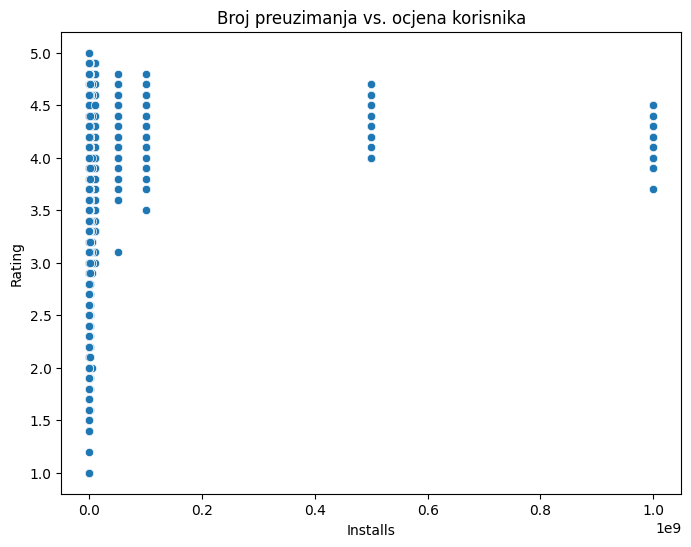

In [ ]:
# Učitavanje podataka
data = pd.read_csv(url)

# Uklanjanje nepotrebnih znakova iz varijable "Installs"
data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '')
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

# Uklanjanje redova sa vrednošću 'Free'
data = data.dropna(subset=['Installs'])

# Analiza raspodele ocjena
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Rating', kde=True)
plt.title('Raspodjela ocjena korisnika')
plt.show()

# Korelacija između broja preuzimanja i ocjene
correlation = data['Installs'].corr(data['Rating'])
print("Korelacijski koeficijent između broja preuzimanja i ocjene:", correlation)

# Analiza grupisanja
grouped_data = data.groupby(pd.cut(data['Installs'], bins=[0, 100000, 1000000, 10000000, float('inf')]))['Rating'].mean()
print("Prosječna ocjena po grupama broja preuzimanja:")
print(grouped_data)

# Vizualizacija podataka
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Installs', y='Rating', data=data)
plt.title('Broj preuzimanja vs. ocjena korisnika')
plt.show()


**Zaključak:** Na osnovu analize vidimo da raspodjela ocjena korisnika ima zvonasti oblik sa najvećim brojem ocjena izmedju 4 i 5.  Korelacijski koeficijent izmedju broja preuzimanja i ocjene korisnika je blago pozitivan. To znači da veza izmedju popularnosti aplikacija (broja preuzimanja) i njihovih ocena nije toliko jaka. Drugim riječima, aplikacije sa većim brojem preuzimanja imaju tendenciju da imaju malo više ocjene, ali ovo nije apsolutno pravilo.

Prosječna ocjena po grupama broja preuzimanja: Analizom grupisanja aplikacija prema broju preuzimanja, primjetili smo da aplikacije sa većim brojem preuzimanja imaju tendenciju da imaju malo više ocjene. Međutim, ova razlika u prosječnim ocjenama između grupa nije značajna.
U zaključku, broj preuzimanja i ocjene korisnika su povezane, ali ta veza nije snažna.

**Hipoteza 3:** Postoji statistički značajna veza između cijene aplikacija i ocjene korisnika u Google Play prodavnici.






<ipython-input-9-6a5be31d91b2>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$', '')
<ipython-input-9-6a5be31d91b2>:18: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Category', y='Price', data=data, dodge=True, jitter=True, size=5, palette='viridis')


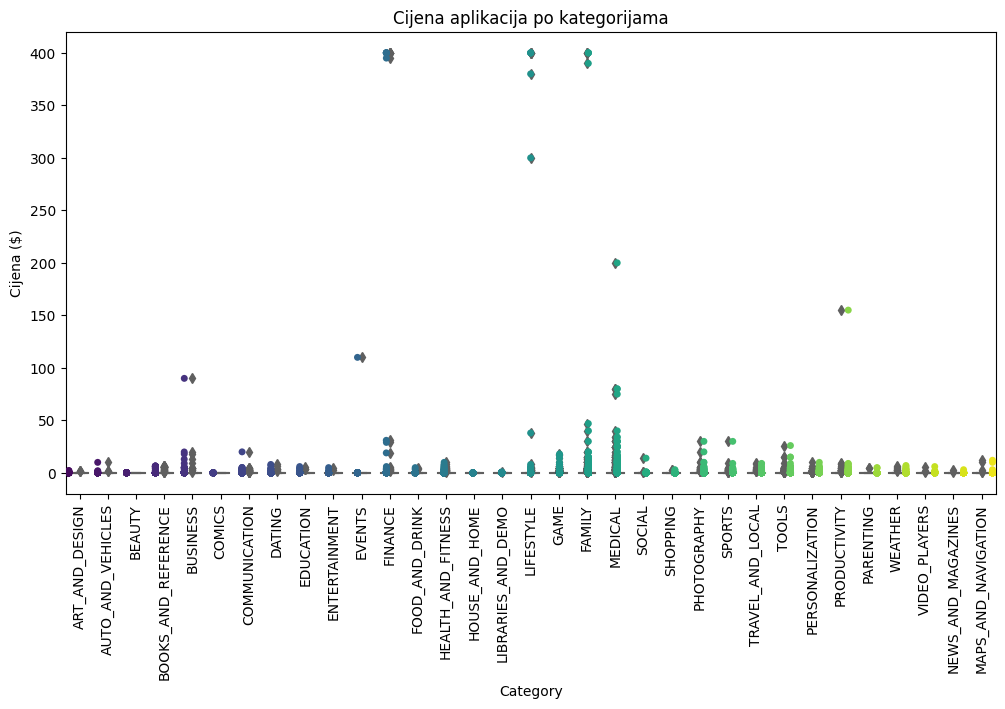

Prosječna ocjena po kategorijama:
Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.0474

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Učitavanje podataka
url = 'https://raw.githubusercontent.com/trilaa/VISS/main/googleplaystore.csv'
data = pd.read_csv(url)

# Uklanjanje nepotrebnih znakova iz varijable "Price"
data['Price'] = data['Price'].str.replace('$', '')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Uklanjanje redova sa vrijednošću 'Free'
data = data.dropna(subset=['Price'])

# Vizualizacija podataka
plt.figure(figsize=(12, 6))
sns.stripplot(x='Category', y='Price', data=data, dodge=True, jitter=True, size=5, palette='viridis')
sns.boxplot(x='Category', y='Price', data=data, width=0.6, palette='Set3')
plt.title('Cijena aplikacija po kategorijama')
plt.xticks(rotation=90)
plt.ylabel('Cijena ($)')
plt.show()

# Analiza prosječne ocjene po kategorijama i cijeni
grouped_data = data.groupby('Category')['Rating'].mean()
print("Prosječna ocjena po kategorijama:")
print(grouped_data)

# Korelacija između cijene aplikacija i ocjene
correlation = data['Price'].corr(data['Rating'])
print("Korelacijski koeficijent između cijene aplikacija i ocjene:", correlation)



**Zaključak:** Na temelju analize podataka i vizualizacije, primjećujemo da cijena aplikacija varira između različitih kategorija. Strip plot nam pruža precizniji uvid u raspodjelu cijena aplikacija po kategorijama, dok box plot prikazuje srednju vrijednost, kvartile i eventualne izuzetke.

Iz prosječnih ocjena po kategorijama vidimo da neke kategorije imaju tendenciju da imaju više ocjene od drugih. Međutim, korelacijski koeficijent između cijene aplikacija i ocjene korisnika je vrlo blizu nula, što ukazuje na vrlo slabu vezu između ove dvije varijable.

Stoga, možemo zaključiti da cijena aplikacija nema značajan utjecaj na ocjene korisnika. Drugim riječima, visoka cijena ne garantira visoku ocjenu, niti niska cijena nužno rezultira niskom ocjenom. Kvaliteta i funkcionalnost aplikacija vjerojatno imaju veći utjecaj na ocjene korisnika nego samo cijena.

**Hipoteza 4:** Aplikacije koje su jeftinije imaju više instalacija.


<ipython-input-25-be9798f58c71>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$', '')
<ipython-input-25-be9798f58c71>:18: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Installs', y='Price', data=data, dodge=True, jitter=True, size=5, palette='viridis')


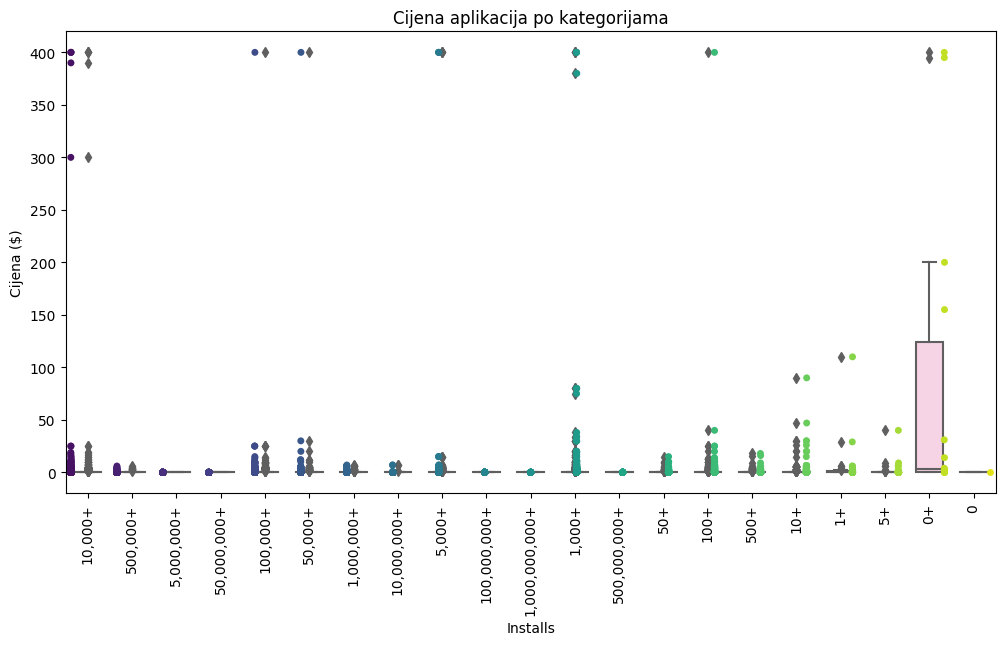

Prosječna ocjena po kategorijama:
Installs
0                  0.000000
0+                86.100714
1+                 2.675970
1,000+             2.935568
1,000,000+         0.043547
1,000,000,000+     0.000000
10+                1.160000
10,000+            2.336622
10,000,000+        0.011957
100+               1.165174
100,000+           0.736912
100,000,000+       0.000000
5+                 0.870488
5,000+             3.014591
5,000,000+         0.000000
50+                0.535220
50,000+            1.260647
50,000,000+        0.000000
500+               0.407939
500,000+           0.071206
500,000,000+       0.000000
Name: Price, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Učitavanje podataka
url = 'https://raw.githubusercontent.com/trilaa/VISS/main/googleplaystore.csv'
data = pd.read_csv(url)

# Uklanjanje nepotrebnih znakova iz varijable "Price"
data['Price'] = data['Price'].str.replace('$', '')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Uklanjanje redova sa vrednošću 'Free'
data = data.dropna(subset=['Price'])

# Vizualizacija podataka
plt.figure(figsize=(12, 6))
sns.stripplot(x='Installs', y='Price', data=data, dodge=True, jitter=True, size=5, palette='viridis')
sns.boxplot(x='Installs', y='Price', data=data, width=0.6, palette='Set3')
plt.title('Cijena aplikacija prema instalacijama')
plt.xticks(rotation=90)
plt.ylabel('Cijena ($)')
plt.show()

# Analiza prosječne cijene po broju instalacija
grouped_data = data.groupby('Installs')['Price'].mean()
print("Prosječna cijena po instalacijiama:")
print(grouped_data)





**Zaključak:** Na temelju analize podataka možemo vidjeti da što je aplikacija jeftinija ima više instalacija.  Čak ako su previsoke cijene ta aplikacija nema instalacije.  Dok ako su cijene prihvatljive ima instalacija ali s mnogo manje od onih koje su jeftinije ili besplatne.  Te prihvatamo postavljenu hipotezu.



**Hipoteza 5:** Aplikacije čija je veličina manja(Size) imaju bolju ocjenu(Rating).

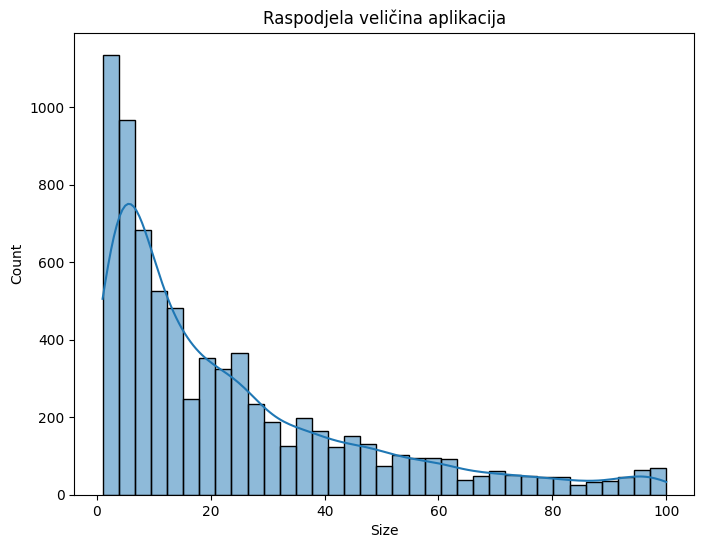

Korelacijski koeficijent između broja preuzimanja i veličina aplikacija: 0.0757881432183287
Prosječna veličina aplikacije po grupama broja preuzimanja:
Rating
(0.0, 100000.0]            23.735578
(100000.0, 1000000.0]            NaN
(1000000.0, 10000000.0]          NaN
(10000000.0, inf]                NaN
Name: Size, dtype: float64


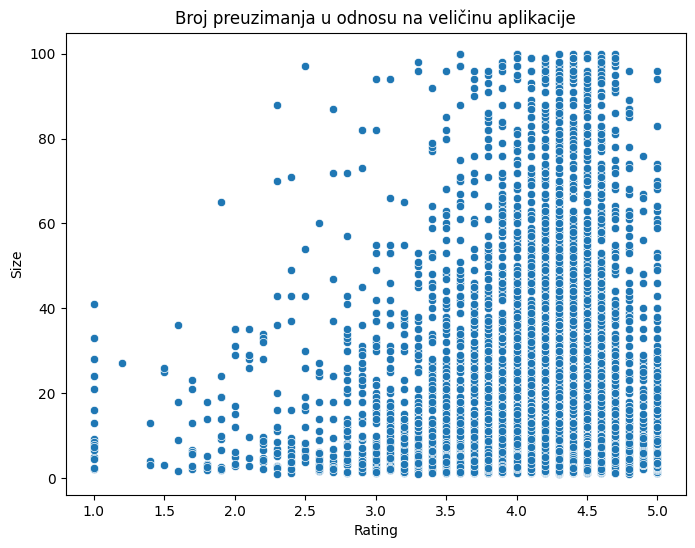

In [ ]:
# Učitavanje podataka
data = pd.read_csv(url)

data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Uklanjanje redova sa vrednošću 'Free'
data = data.dropna(subset=['Rating'])

#Uklanjanje nepotrebnih znakova iz varijable "Size"
data['Size'] = data['Size'].str.replace('M', '')
data['Size'] = pd.to_numeric(data['Size'], errors='coerce')

# Analiza raspodele veličina aplikacija
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Size', kde=True)
plt.title('Raspodjela veličina aplikacija')
plt.show()


# Korelacija između ocjene i veličina aplikacija
correlation = data['Rating'].corr(data['Size'])
print("Korelacijski koeficijent između ocjene i veličina aplikacija:", correlation)

# Analiza grupisanja
grouped_data = data.groupby(pd.cut(data['Rating'], bins=[0, 100000, 1000000, 10000000, float('inf')]))['Size'].mean()
print("Prosječna veličina aplikacije po grupama ocjena:")
print(grouped_data)

# Vizualizacija podataka
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Size', data=data)
plt.title('Ocjena u odnosu na veličinu aplikacije')
plt.show()

**Zaključak:** Na temelju analize podataka možemo vidjeti sa Scatter-plota da što je aplikacija manja(to jeste njena veličina, zauzima manje prostora u memoriji) ima veću ocjenu.  Kolearcijski koeficijent pošto je pozitivan
(0.0757881432183287) ne govori nam ništa. Dakle aplikacije koju su "velike" nemaju baš visoku ocjenu. Što znači da ne odbacujemo našu hipotezu.

**Hipoteza 6:** Više su preuzete(Installs) aplikacije čija je veličina manja(Size).

Koristit ćemo histogram da bi prikazali distribuciju veličina, dok ćemo za utvrđivanje veze između varijabli "Size" i "Installs" računati korelacijski koeficijent. Za vizualizaciju koristimo scatter i violin plot.

<ipython-input-11-d8252e207a91>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '')
<ipython-input-11-d8252e207a91>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Size'] = data['Size'].str.replace('M', '')
<ipython-input-11-d8252e207a91>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

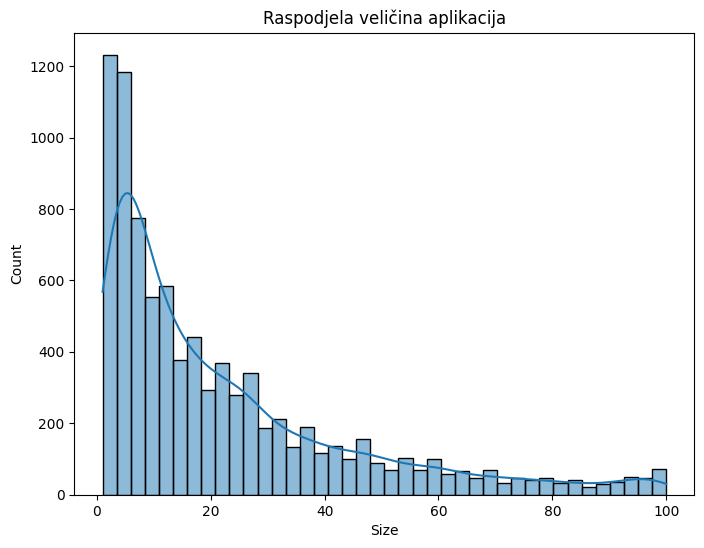

Korelacijski koeficijent između broja preuzimanja i veličina aplikacija: 0.16255701378272042
Prosječna veličina aplikacije po grupama broja preuzimanja:
Installs
(0.0, 100000.0]            16.668091
(100000.0, 1000000.0]      25.919694
(1000000.0, 10000000.0]    32.445104
(10000000.0, inf]          47.338144
Name: Size, dtype: float64


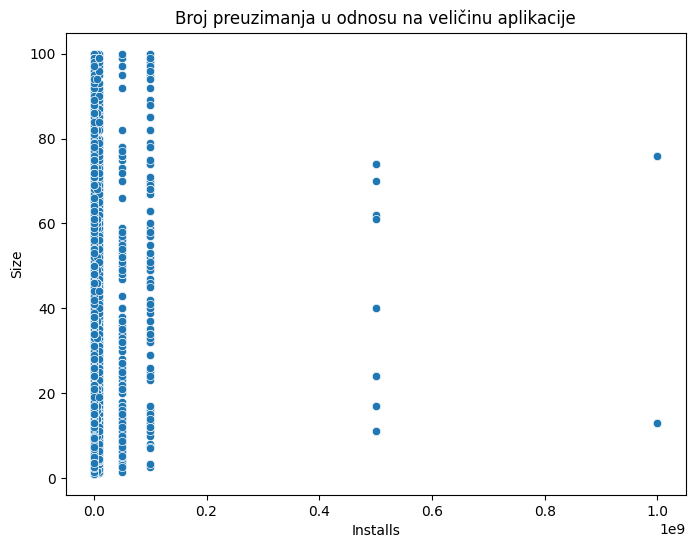

In [ ]:
# Učitavanje podataka
data = pd.read_csv(url)

# Uklanjanje nepotrebnih znakova iz varijable "Installs"
data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '')
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

# Uklanjanje redova sa vrednošću 'Free'
data = data.dropna(subset=['Installs'])

#Uklanjanje nepotrebnih znakova iz varijable "Size"
data['Size'] = data['Size'].str.replace('M', '')
data['Size'] = pd.to_numeric(data['Size'], errors='coerce')

# Analiza raspodele veličina aplikacija
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Size', kde=True)
plt.title('Raspodjela veličina aplikacija')
plt.show()


# Korelacija između broja preuzimanja i veličina aplikacija
correlation = data['Installs'].corr(data['Size'])
print("Korelacijski koeficijent između broja preuzimanja i veličina aplikacija:", correlation)

# Analiza grupisanja
grouped_data = data.groupby(pd.cut(data['Installs'], bins=[0, 100000, 1000000, 10000000, float('inf')]))['Size'].mean()
print("Prosječna veličina aplikacije po grupama broja preuzimanja:")
print(grouped_data)

# Vizualizacija podataka
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Installs', y='Size', data=data)
plt.title('Broj preuzimanja u odnosu na veličinu aplikacije')
plt.show()

<ipython-input-13-05922885e702>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Installs'] = pd.to_numeric(data['Installs'].str.replace(',', '').str.replace('+', ''), errors='coerce')


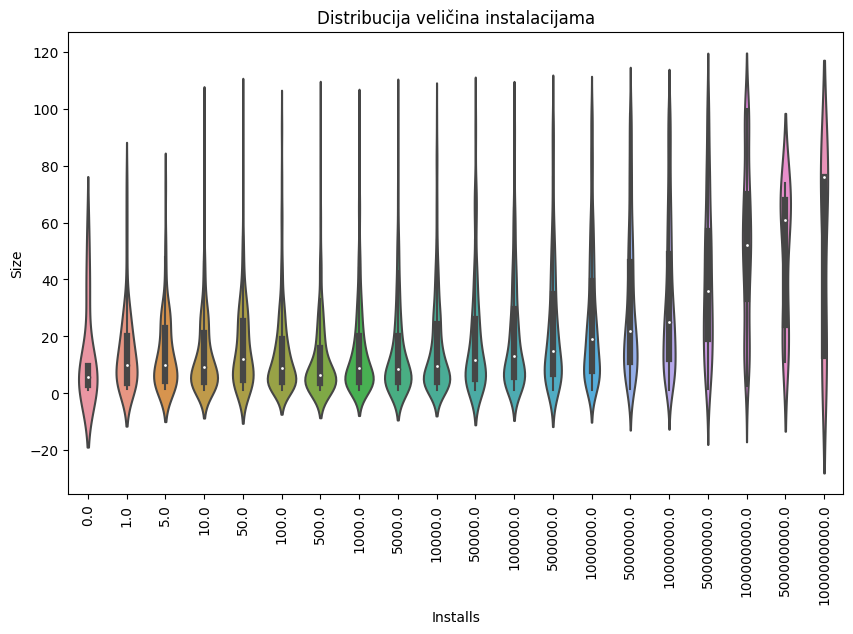

In [ ]:
#Violin plot
# Učitavanje dataset-a
data = pd.read_csv(url)

# Pretvaranje varijable "Installs" u numerički oblik
data['Installs'] = pd.to_numeric(data['Installs'].str.replace(',', '').str.replace('+', ''), errors='coerce')
# Uklanjanje redova sa vrednošću 'Free'
data = data.dropna(subset=['Installs'])

#Uklanjanje nepotrebnih znakova iz varijable "Size"
data['Size'] = data['Size'].str.replace('M', '')
data['Size'] = pd.to_numeric(data['Size'], errors='coerce')

# Uklanjanje NaN vrijednosti
data = data.dropna(subset=['Installs', 'Size'])

# Prikaz violin plot-a
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['Installs'], y=data['Size'])
plt.xlabel('Installs')
plt.ylabel('Size')
plt.title('Distribucija veličina instalacijama')
plt.xticks(rotation=90)
plt.show()

**Zaključak:** Na osnovu scatter plota broja preuzimanja aplikacija u odnosu na veličine aplikacija, primjećujemo da je aplikacija koje su manje broj preuzimanja veći, tj. na samom početku scatterplota. Većina preuzimanja su između 0 i 20 M. Korelacijski koeficijent je pozitivan(0.16255701378272042) što nije dovoljno da zaključimo o korelaciji varijabli.
Prosječna veličina najpreuzetijih aplikacija(10000000.0, inf) je oko 47 M, dok su najmanje preuzete aplikacije(0.0, 100000.0) prosječne dužine oko 17 M. Proporcionalno je i za preuzetnost između njih.
S tim je hipoteza odbačena, jer primjećujemo da za više preuzete aplikacije u prosjeku treba 47 M memorije.

**Hipoteza 7:** Postoji veza između žanra aplikacije(Genres) i informacije za koga je namjenjena aplikacija(Content).

Pošto koristimo dvije kategoričke varijable a ne numeričke, koristit ćemo prebrojavanje njihovih međusobnih dešavanja i prikazati ga u bar plotu, i to u običnom i proporcionalisanom.

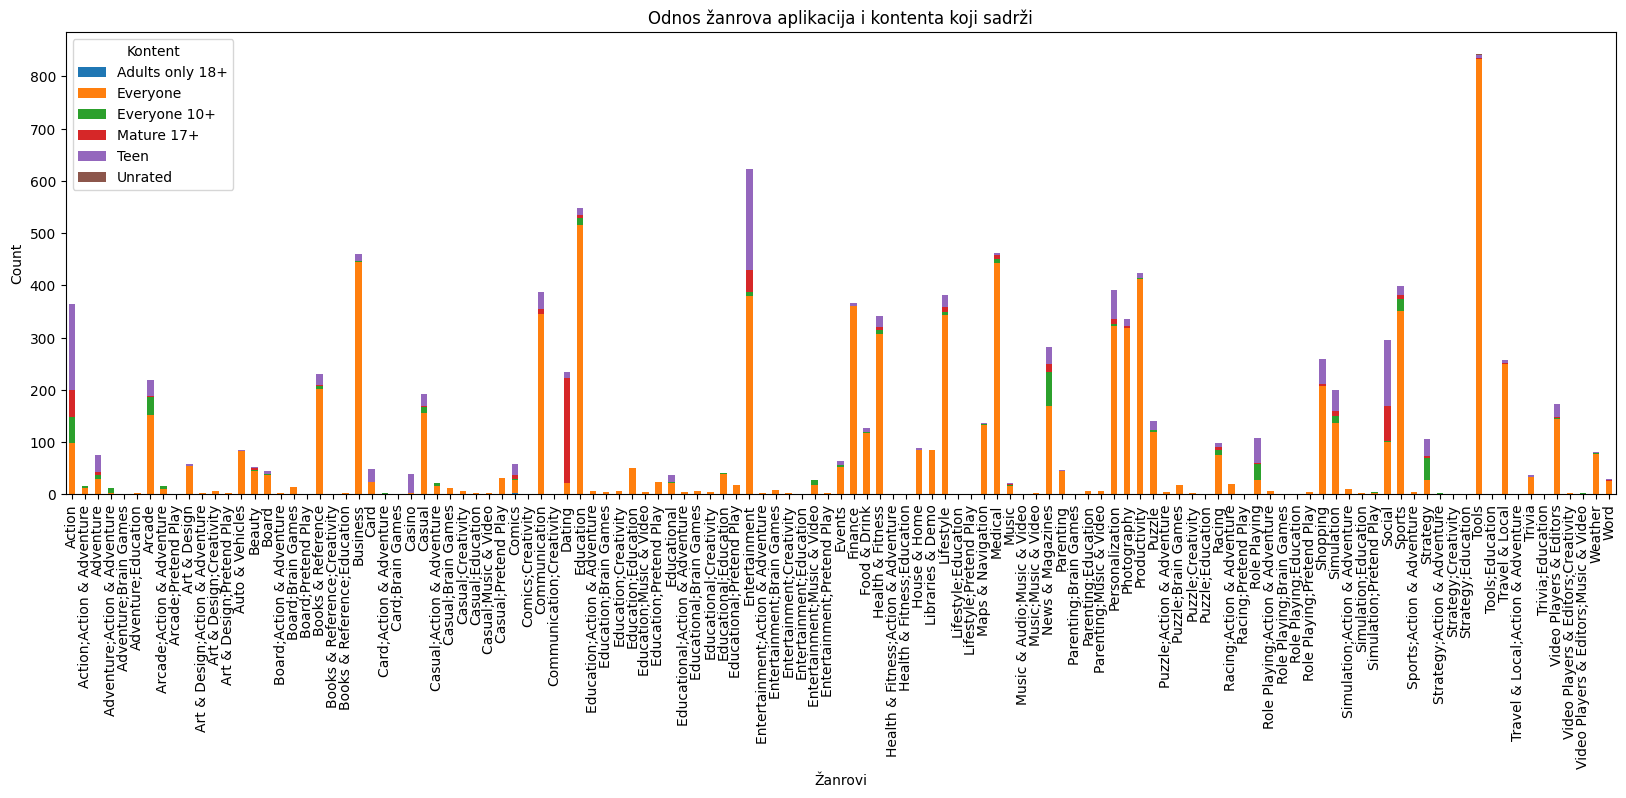

In [ ]:
# Učitavanje dataseta
data = pd.read_csv(url)

# Odabir relativnih kolona
selected_columns = ['Genres', 'Content Rating']
data_selected = data[selected_columns]

# Prebrojavanje koliko puta se ponavljaju kombinacije zanrova i kontenta
grouped_data = data_selected.groupby(['Genres', 'Content Rating']).size().unstack()

# Stvaranje bar plota
grouped_data.plot(kind='bar', stacked=True, figsize=(20, 6))
plt.title('Odnos žanrova aplikacija i kontenta koji sadrži')
plt.xlabel('Žanrovi')
plt.ylabel('Count')
plt.legend(title='Kontent')
plt.show()

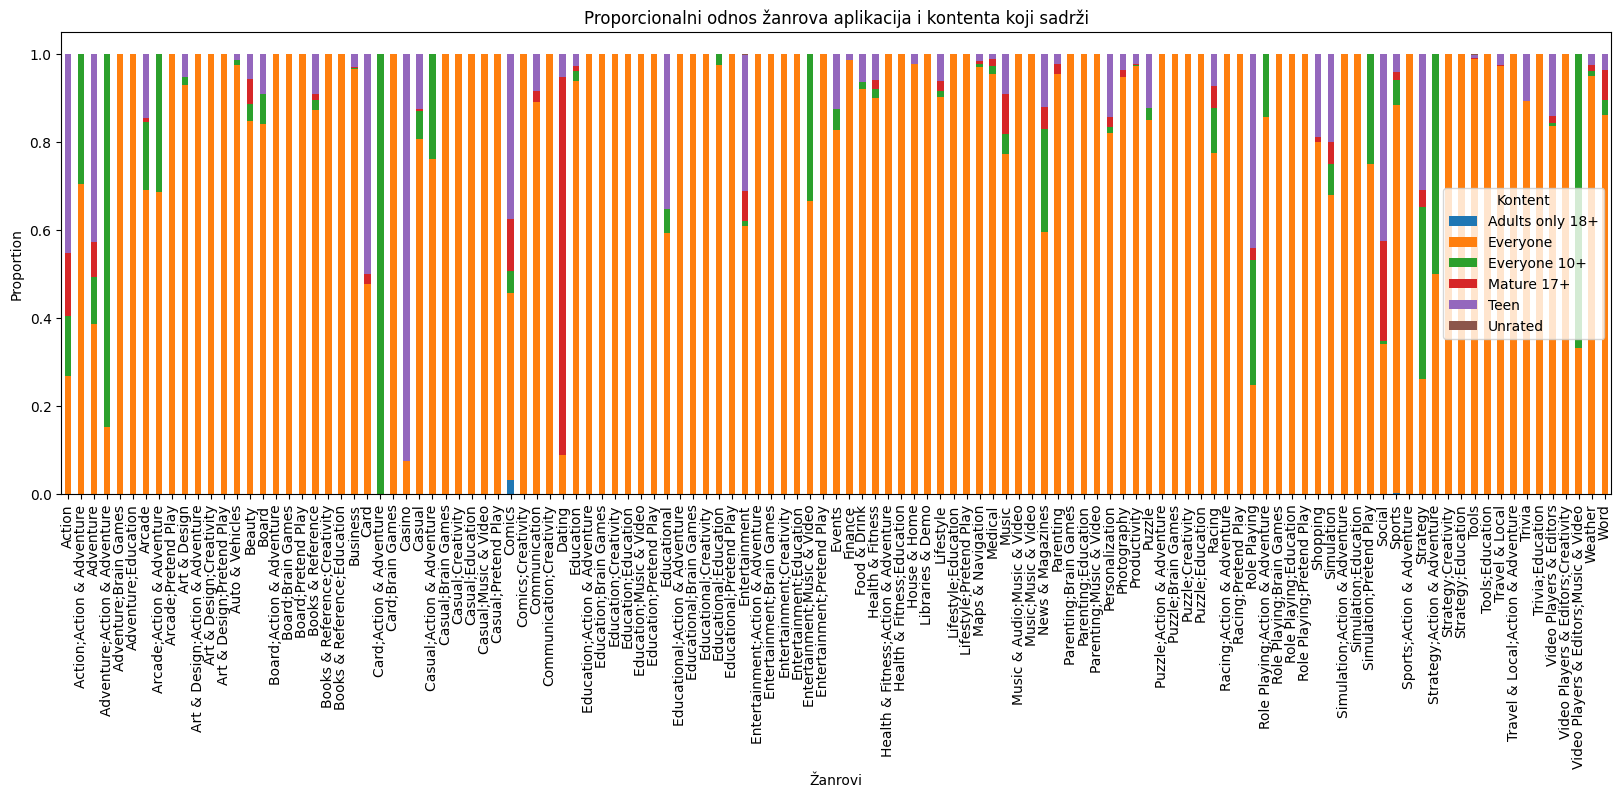

In [ ]:
# Učitavanje dataseta
data = pd.read_csv(url)

# Odabir relativnih kolona
selected_columns = ['Genres', 'Content Rating']
df_selected = df[selected_columns]

# Prebrojavanje koliko puta se ponavljaju kombinacije zanrova i kontenta
grouped_data = df_selected.groupby(['Genres', 'Content Rating']).size().unstack()

# Normaliziranje vrijednosti da predstavljaju proporcije
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# Stack-ovani bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(20, 6))
plt.title('Proporcionalni odnos žanrova aplikacija i kontenta koji sadrži')
plt.xlabel('Žanrovi')
plt.ylabel('Proportion')
plt.legend(title='Kontent')
plt.show()

**Zaključak:** Prema plotovima primjećujemo da je jedna boja najzastupljenjija - narandžasta. Ona u našem slučaju predstavlja opciju kontenta "za sve uzraste" tj. "Everyone". S tim da ima vrlo malo žanrova čije aplikacije nisu većinski "za sve uzraste", možemo odbaciti hipotezu da su žanrovi i namjenski kontent povezani, to jest većina aplikacija se ne vodi po tome kakav je žanr da bi saznali kontent i obrnuto, jer nema dovoljno jake veze.